# Caracterização Meteorológica da área de estudo

Aluna: Bárbara Girardi

Nesta atividade, caracterizaremos a meteorologia da área de estudo. Avaliaremos os seguintes pontos:

1. Meteorologia da Superfície
2. Meteorologia upperair ou sondagem/perfil da atmosfera
3. Superfície - Albedo, Razão de Bowen e Rugosidade

## Meteorologia de Superfície
Analisaremos os dados de metar (estação meteorológica em aeroportos). Os dados serão coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR para o período de 01/01/2023 a 01/01/2024.

Os dados estarão na pasta inputs/meteoSuperficie com a nomenclatura metar.csv

In [25]:
#Selecionar arquivo para an[alise

import os #faz puxar a tabela pro código
rootPath = os.getcwd()
print(rootPath) #mostra a pasta/diretório que estou no momento

metSuperficiePath = rootPath + '\\inputs\\meteoSuperficie' #puxa a pasta correta de onde está o dado (tabela). Fazendo assim, consigo escolher qualquer arquivo para puxar dentro dessa pasta
print(metSuperficiePath) 

#Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath) #lista todos os dados que tem na pasta
print(files)

C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara
C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara\inputs\meteoSuperficie
['metar_2021.csv', 'metar_2022.csv', 'metar_2023.csv']


In [26]:
#Abrindo os arquivos metar
import pandas as pd

#Abrindo cada arquivo dentro da pasta e acumulado em uma lista chamada de metSuperficie
metSuperficie = []
for file in files: #faz um por um
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file)) #concatena o caminho da pasta junto com dois arquivos. 

#Convertendo o metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2021     0 NaN  190.0  3.601108   914.4  6.0  6.0   
1       1      1  2021     1 NaN  190.0  4.115552   914.4  6.0  6.0   
2       1      1  2021     2 NaN  180.0  5.658884   914.4  6.0  6.0   
3       1      1  2021     3 NaN  190.0  4.115552   914.4  6.0  6.0   
4       1      1  2021     4 NaN  190.0  4.629996   914.4  3.0  3.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.665616  23.0    21.0  NaN  0.0  88.51  
1     1009.662022  23.0    20.0  NaN  0.0  83

In [27]:
#Criar uma coluna com Datetime dos dados

metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year','month','day','hour']])
print(metSuperficie['datetime'])

#Definindo a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

0      2021-01-01 00:00:00
1      2021-01-01 01:00:00
2      2021-01-01 02:00:00
3      2021-01-01 03:00:00
4      2021-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 26251, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,1,1,2021,0,NaN,190.0,3.601108,914.4,6.0,6.0,1009.665616,23.0,21.0,NaN,0.0,88.51,2021-01-01 00:00:00
2021-01-01 01:00:00,1,1,2021,1,NaN,190.0,4.115552,914.4,6.0,6.0,1009.662022,23.0,20.0,NaN,0.0,83.21,2021-01-01 01:00:00
2021-01-01 02:00:00,1,1,2021,2,NaN,180.0,5.658884,914.4,6.0,6.0,1009.662022,22.0,20.0,NaN,0.0,88.43,2021-01-01 02:00:00
2021-01-01 03:00:00,1,1,2021,3,NaN,190.0,4.115552,914.4,6.0,6.0,1009.662022,22.0,20.0,NaN,0.0,88.43,2021-01-01 03:00:00
2021-01-01 04:00:00,1,1,2021,4,NaN,190.0,4.629996,914.4,3.0,3.0,1009.662022,22.0,19.0,NaN,0.0,83.09,2021-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.651241,25.0,18.0,NaN,0.0,65.12,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.651241,24.0,18.0,NaN,0.0,69.14,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.654835,24.0,18.0,NaN,0.0,69.14,2023-12-31 21:00:00


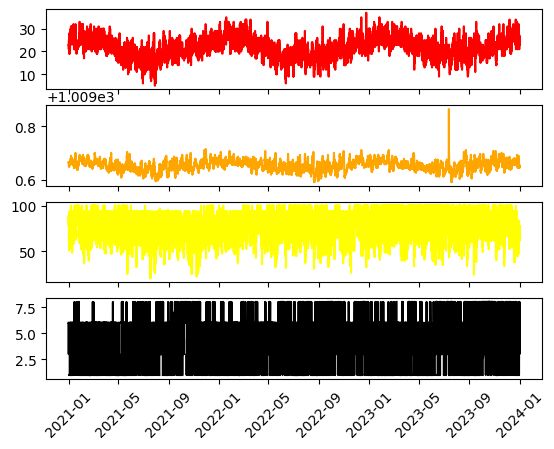

In [31]:
#Analisando os dados através de figuras
import matplotlib.pyplot as plt

fig,ax = plt.subplots(4, sharex = True)
ax[0].plot(metSuperficie['datetime'],metSuperficie['temp'], color = 'red')
ax[1].plot(metSuperficie['datetime'],metSuperficie['p'], color = 'orange')
ax[2].plot(metSuperficie['datetime'],metSuperficie['relh'], color = 'yellow')
ax[3].plot(metSuperficie['datetime'],metSuperficie['cco'], color = 'black')
ax[3].tick_params(axis='x', rotation = 45)

In [ ]:
#Estatísticas dos dados

media_mensal = df.resample('M').mean()
print(media_mensal)